
# **Transformer models-**


*   [Text classification](#classify)
*   [Translation](#translate)
*   [Text generation](#generate)
*   [Chatgpt](#chatgpt)
*   [Small exercise using Elon Musk's tweets](#exercise)

Some of the codes here are from huggingface.co/course <br>
Twitter data for the small exercise has been obtained from https://data.world/adamhelsinger/elon-musk-tweets-until-4-6-17

DESCRIPTION - <br>
Elon Musk's tweets from 2010-06-04 to 2017-04-05.

SUMMARY-<br>
Includes:<br>
* Tweet ID <br>
* Date & Time Tweet was created <br>
* Tweets & Mentions <br>

Note: In order to use GPU, please follow the steps before you start running the codes: Runtime > Change runtime type > Hardware Accelerator



Load necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
import time
import csv
import datetime
import io
from matplotlib import pyplot as plt
import seaborn as sns

from transformers import pipeline, set_seed
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
from scipy.special import softmax

import urllib.request

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

import torch
torch.cuda.is_available() # is a function in the PyTorch library that checks if a CUDA-enabled GPU is available on your system.

True

In [29]:
import warnings

# Suppress specific categories of warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Text classification



In [39]:
from transformers import pipeline

classifier = pipeline("text-classification", model="nlptown/bert-base-multilingual-uncased-sentiment")

text = "SpaceX's mission to Mars is a revolutionary step in space exploration."

result = classifier(text)
print(result)


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': '5 stars', 'score': 0.6159172654151917}]


### Zero-shot classification

In [ ]:
classifier = pipeline("zero-shot-classification", model='facebook/bart-large-mnli')
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445993661880493, 0.1119738519191742, 0.04342673718929291]}

## Grammatical correctness

In [ ]:
classifier = pipeline("text-classification", model = "textattack/distilbert-base-uncased-CoLA")
classifier("I will walk to home when I went through the bus.")
# Label_1== unacceptable

config.json:   0%|          | 0.00/490 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': 'LABEL_1', 'score': 0.9576481580734253}]

## sentiment analysis

This pipeline selects a particular pretrained model that has been fine-tuned for sentiment analysis in English. The model is downloaded and cached when you create the classifier object.

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model='distilbert/distilbert-base-uncased-finetuned-sst-2-english')
classifier("I've been waiting for a HuggingFace course my whole life.")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9598048329353333}]

# Translation

In [ ]:
# Load the translation pipeline
translator = pipeline("translation_en_to_fr", model="Helsinki-NLP/opus-mt-en-fr")

# Define the text to be translated
text_to_translate = "I am sitting in a NLP workshop"

# Translate the text
translated_text = translator(text_to_translate, max_length=40)

# Display the translated text
print("Original Text:", text_to_translate)
print("Translated Text:", translated_text[0]['translation_text'])


/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Original Text: I am sitting in a NLP workshop
Translated Text: Je suis assis dans un atelier NLP


# Text generation

max_length: This specifies the maximum length of the generated text. <br>
num_return_sequences: This specifies the number of generated sequences to return

In [ ]:
generator = pipeline('text-generation', model='gpt2')
prompt="I am sitting in a NLP workshop"
set_seed(4)
generator(prompt, max_length=30, num_return_sequences=5)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'I am sitting in a NLP workshop, we have about 75 kids. Each of us is a part of one of the oldest institutions in the world'},
 {'generated_text': 'I am sitting in a NLP workshop in Walthampton with Dr. John C. Mather and a colleague and I will talk about what'},
 {'generated_text': 'I am sitting in a NLP workshop, with my laptop, at all hours, and being asked to get some information from their technical support. This'},
 {'generated_text': 'I am sitting in a NLP workshop while a friend is teaching me German and they are just passing by. Then I hear someone say that their local'},
 {'generated_text': "I am sitting in a NLP workshop with me and a few friends, and I am curious to see what you think about this topic. We've"}]

# ChatGPT

In [ ]:
# pip install openai==0.28

In [ ]:
import os
import openai
os.environ["OPENAI_API_KEY"] = 'YOUR_KEY'

# Set your OpenAI API key from the environment variable
openai.api_key = os.getenv("OPENAI_API_KEY")

def get_chatgpt_response(prompt):
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # or "gpt-4" if you have access
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=150,  # Adjust the max tokens based on your needs
        temperature=0.7,  # Adjust the temperature based on the creativity you need
    )
    return response['choices'][0]['message']['content'].strip()

# Main loop to interact with the user
while True:
    user_input = input("Enter a prompt (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    response = get_chatgpt_response(user_input)
    print("ChatGPT:", response)


Enter a prompt (or 'exit' to quit): 1+1
ChatGPT: 1 + 1 equals 2.
Enter a prompt (or 'exit' to quit): Tell me a joke about programming
ChatGPT: Why do programmers prefer dark mode? Because the light attracts bugs!
Enter a prompt (or 'exit' to quit): exit


How to count the number of tokens? <br>
Encode the Text and Count Tokens: 

You can use the tiktoken library to encode your text and count the number of tokens. Here's an example:


In [ ]:
# %pip install tiktoken


In [ ]:
import tiktoken

# Initialize the tokenizer for the specific GPT model
# For example, use 'gpt-3.5-turbo' tokenizer
encoding = tiktoken.encoding_for_model('gpt-3.5-turbo')

# Sample text
text = "Hello world! This is a test sequence to count tokens."

# Encode the text to get the token IDs
tokens = encoding.encode(text)

# Count the number of tokens
num_tokens = len(tokens)

print(f"Number of tokens: {num_tokens}")


- Counting Tokens for Multiple Inputs:

If you have multiple pieces of text (such as user input and system messages), you can concatenate them and then count the tokens. Here’s how you can do it:

In [ ]:
import tiktoken

# Initialize the tokenizer for the specific GPT model
encoding = tiktoken.encoding_for_model('gpt-3.5-turbo')

# Sample inputs
system_message = "You are a helpful assistant."
user_input = "Can you help me count the tokens in this message?"

# Encode each input separately
system_tokens = encoding.encode(system_message)
user_tokens = encoding.encode(user_input)

# Combine the tokens and count the total number of tokens
total_tokens = len(system_tokens) + len(user_tokens)

print(f"Total number of tokens: {total_tokens}")


# Small exercise using Elon Musk's tweets

Using the data from Twitter, compute sentiment scores and topic classification on his tweets. Try using zero-shot classification model for the topic classification exercise. Feel free to provide any candidate labels.

See which topics induce most positive sentiments for Elon.
Try to see also which words are mostly related to positive/negative tones.


## Sentiment analysis

### RoBerTa based sentiment analysis

In [ ]:
task='sentiment'
device = "cuda:0" if torch.cuda.is_available() else "cpu"
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]


In [ ]:
# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)
tokenizer.save_pretrained(MODEL)
model=model.to(device)
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
      # Read the uploaded file into a DataFrame
  if fn.endswith('.csv'):
      # If the file is a CSV
      df = pd.read_csv(io.BytesIO(uploaded[fn]))
  elif fn.endswith(('.xls', '.xlsx')):
      # If the file is an Excel file
      df = pd.read_excel(io.BytesIO(uploaded[fn]))
  else:
      print(f"Unsupported file format: {fn}")

Saving elonmusk_tweets.csv to elonmusk_tweets.csv
User uploaded file "elonmusk_tweets.csv" with length 370315 bytes


In [ ]:
df.head(5)

,uid,created_at,text
0,8.496370e+17,05-4-2017 14:56,b'And so the robots spared humanity ... https:...
1,8.489890e+17,03-4-2017 20:01,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa..."
2,8.489430e+17,03-4-2017 16:59,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'"
3,8.489360e+17,03-4-2017 16:30,b'Stormy weather in Shortville ...'
4,8.484160e+17,02-4-2017 6:05,"b""@DaveLeeBBC @verge Coal is dying due to nat ..."


In [9]:
# model crashes if you send the whole df through at once. So we create batches to
# divide an iterable (like a list or DataFrame) into smaller chunks or batches.

def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]


In [ ]:
#pass batches through model to get scores
#even with batches, the model can be slow (~20 seconds to score 100 tweets)
done=0
score_output = []
rob_table=[]
print(datetime.datetime.now())

for chunk in batch(df[['text', 'uid']], 100):
    for x, line in chunk.iterrows():
        done+=1
        try:
            encoded_input = tokenizer(line['text'], return_tensors='pt', padding=True,
                                      truncation=True, max_length=50, add_special_tokens = True).to(device)
            output = model(**encoded_input)
            scores = output[0][0].detach().cpu()
            scores = softmax(scores)
            score_output.append(scores)
            rob_table.append((str(line['uid']), line['text'], scores[0], scores[1], scores[2]))
        except ValueError as e:
            rob_table.append((str(line['uid']), line['text'], np.nan,np.nan,np.nan))
        if done %500==0:
            print(done, datetime.datetime.now())


2024-06-01 09:55:04.494270
500 2024-06-01 09:55:20.281411
1000 2024-06-01 09:55:29.701297
1500 2024-06-01 09:55:36.677422
2000 2024-06-01 09:55:43.561380
2500 2024-06-01 09:55:50.280411


In [ ]:
roberta_Sent=pd.DataFrame(rob_table, columns=['uid', 'texts', 'rob_neg', 'rob_neu', 'rob_pos'])
roberta_Sent.head(5)
# roberta_Sent.to_csv('./roberta_sentiments_musks_Tweets.csv', index=None)
# files.download('./roberta_sentiments_musks_Tweets.csv')

,uid,texts,rob_neg,rob_neu,rob_pos
0,8.49637e+17,b'And so the robots spared humanity ... https:...,0.253208,0.631289,0.115503
1,8.48989e+17,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",0.590492,0.343646,0.065862
2,8.48943e+17,"b'@waltmossberg @mims @defcon_5 Et tu, Walt?'",0.053500,0.894545,0.051955
3,8.48936e+17,b'Stormy weather in Shortville ...',0.074128,0.874859,0.051013
4,8.48416e+17,"b""@DaveLeeBBC @verge Coal is dying due to nat ...",0.891088,0.101267,0.007645


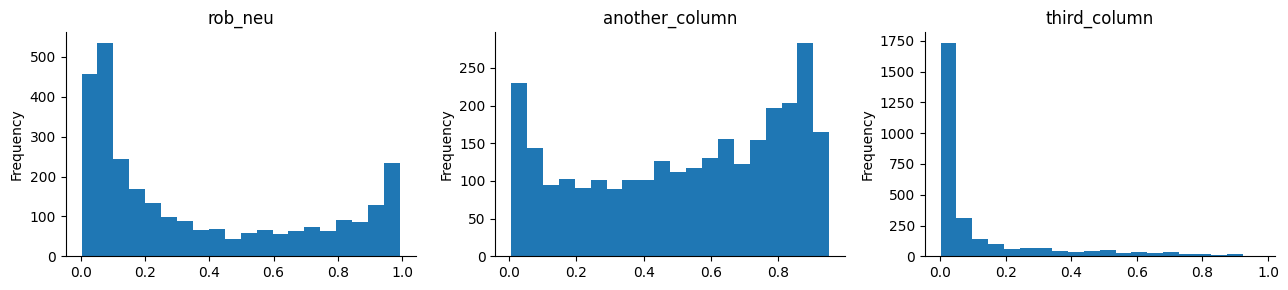

In [ ]:
from matplotlib import pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(13,3))

# Plot the histograms
roberta_Sent['rob_pos'].plot(kind='hist', bins=20, ax=axs[0], title='rob_neu')
axs[0].spines[['top', 'right']].set_visible(False)

roberta_Sent['rob_neu'].plot(kind='hist', bins=20, ax=axs[1], title='another_column')
axs[1].spines[['top', 'right']].set_visible(False)

# Plot the third histogram
roberta_Sent['rob_neg'].plot(kind='hist', bins=20, ax=axs[2], title='third_column')
axs[2].spines[['top', 'right']].set_visible(False)

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Get the sentiment label with the highest score
roberta_Sent[['rob_neg', 'rob_neu', 'rob_pos']]=roberta_Sent[['rob_neg', 'rob_neu', 'rob_pos']].astype(float)
roberta_Sent['roberta_overall']=roberta_Sent[['rob_neg', 'rob_neu', 'rob_pos']].idxmax(axis=1)
roberta_Sent.head(2)

,uid,texts,rob_neg,rob_neu,rob_pos,roberta_overall
0,8.49637e+17,b'And so the robots spared humanity ... https:...,0.253208,0.631289,0.115503,rob_neu
1,8.48989e+17,"b""@ForIn2020 @waltmossberg @mims @defcon_5 Exa...",0.590492,0.343646,0.065862,rob_neg


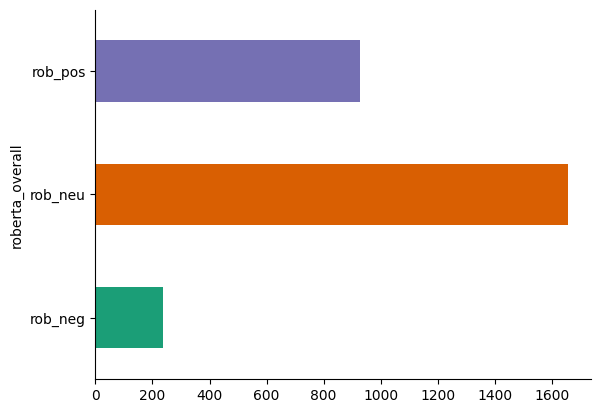

In [ ]:
# roberta_overall

from matplotlib import pyplot as plt
import seaborn as sns
roberta_Sent.groupby('roberta_overall').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Analyse topics of Elon Musk's tweets using zero-shot classification

In [ ]:
import datetime
classifier = pipeline("zero-shot-classification", model='facebook/bart-large-mnli')

done=0
print(datetime.datetime.now())

for chunk in batch(roberta_Sent, 100):
    for x, y in chunk.iterrows():
      text=y['texts']

      done+=1
      # Classify using zero-shot classification
      classification = classifier(text, candidate_labels=['Technology', 'Twitter', 'Developer', 'Business', 'News', 'SpaceX', 'Others'], multi_label=False)
      # Get the predicted label
      predicted_label = classification["labels"][0]
      y['predicted_label']= predicted_label

      if done %500==0:
        print(done, datetime.datetime.now())


In [ ]:
import datetime
from concurrent.futures import ThreadPoolExecutor, as_completed

# Initialize the zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model='facebook/bart-large-mnli')

# Function to classify a single text
def classify_text(row):
    text = row['texts']
    classification = classifier(text, candidate_labels=['Technology', 'Twitter', 'Developer', 'Business', 'News', 'SpaceX', 'Others'], multi_label=False)
    predicted_label = classification["labels"][0]
    row['predicted_label'] = predicted_label
    return row


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

2024-06-01 09:59:22.546467


In [8]:
def batch(iterable, n=1):
    iterator = iter(iterable)
    while True:
        batch_chunk = []
        try:
            for _ in range(n):
                batch_chunk.append(next(iterator))
        except StopIteration:
            if batch_chunk:
                yield batch_chunk
            break
        yield batch_chunk


In [ ]:
# Randomly sample 50 lines from the DataFrame because the code runs slow
random_sample = roberta_Sent.sample(n=50, random_state=42)


In [ ]:
# Process data
done = 0
print(datetime.datetime.now())

# Process in parallel
with ThreadPoolExecutor(max_workers=8) as executor:  # Adjust max_workers based on your system's capabilities
    futures = []
    for chunk in batch(random_sample.iterrows(), 100):
        for x, y in chunk:
            futures.append(executor.submit(classify_text, y))

    for future in as_completed(futures):
        done += 1
        if done % 500 == 0:
            print(f"Processed {done} rows", datetime.datetime.now())
        # Update the DataFrame with the result
        result = future.result()
        random_sample.at[result.name, 'predicted_label'] = result['predicted_label']

print("Processing complete", datetime.datetime.now())


2024-06-01 10:09:15.090888
Processing complete 2024-06-01 10:17:25.764721


In [ ]:
random_sample.head(3)

,uid,texts,rob_neg,rob_neu,rob_pos,roberta_overall,predicted_label
2408,3.06613e+17,b'@andrewliebchen @_chrissimmons Exactly. Then...,0.234504,0.645939,0.119556,rob_neu,Twitter
1413,6.56969e+17,b'@drew already there',0.080181,0.855488,0.064331,rob_neu,Twitter
1034,7.26559e+17,"b'@mattyteare Basically current, but higher th...",0.003812,0.163227,0.832961,rob_pos,Business


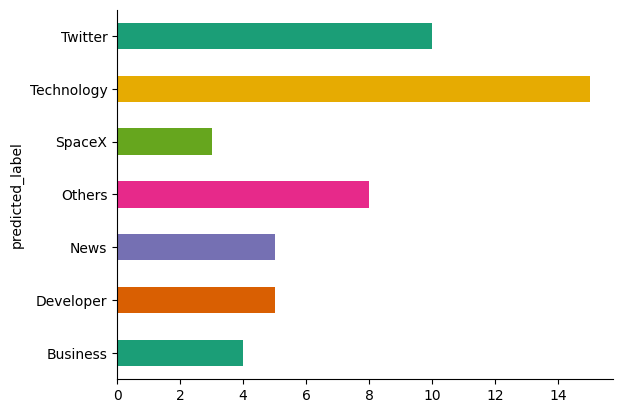

In [ ]:
# @title predicted_label

random_sample.groupby('predicted_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

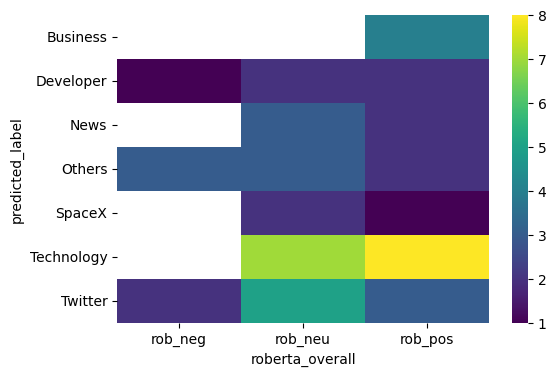

In [ ]:
# @title roberta_overall vs predicted_label

plt.subplots(figsize=(6, 4))
df_2dhist = pd.DataFrame({
    x_label: grp['predicted_label'].value_counts()
    for x_label, grp in random_sample.groupby('roberta_overall')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('roberta_overall')
_ = plt.ylabel('predicted_label')

## Use chatgpt to generate Elon Musk-style tweets based on his previous tweets.

In [ ]:
# %pip install openai==0.28

In [ ]:
import openai
import os
# Set your OpenAI API key

os.environ["OPENAI_API_KEY"] = 'YOUR_KEY'

# Set your OpenAI API key from the environment variable
openai.api_key = os.getenv("OPENAI_API_KEY")

elons_tweets= "\n".join(roberta_Sent['texts'][100])


In [ ]:
# Choose the GPT-3 chat model
model_name = "gpt-3.5-turbo-16k"

# Prompt for generating Elon Musk-style tweets
prompt =f"""
Elon Musk tweets:

{elons_tweets}

Generate an Elon Musk-style tweet about the future of technology or space exploration.
"""

In [ ]:
# Generate text using the specified GPT-3 chat model
response = openai.ChatCompletion.create(
    model=model_name,
    n=5, # Number of responses to generate
    stop="\n", # Stop generation at the end of a line
    max_tokens=50, # Adjust the number of tokens for longer or shorter tweets
    temperature=0.7,  # Adjust the temperature for more or less randomness
    messages=[{"role": "system", "content": prompt}]
)

In [ ]:
# Print the generated tweet
print("Generated Tweet:")
print(response["choices"][0]["message"]["content"].strip())
print(response["choices"][1]["message"]["content"].strip())
print(response["choices"][2]["message"]["content"].strip())
print(response["choices"][3]["message"]["content"].strip())
print(response["choices"][4]["message"]["content"].strip())

Generated Tweet:
"Perhaps there will be some future bill that makes a difference for Mars, but this is not it. Innovation and collaboration are the keys to unlocking the boundless potential of technology and space exploration. Stay tuned for game-changing developments!"
"The future holds incredible potential for technology and space exploration. Perhaps there will be a breakthrough bill that revolutionizes our journey to Mars, but this is not it. Stay tuned for exciting developments!"
The future holds infinite possibilities for technology and space exploration. Maybe there will be a breakthrough bill that revolutionizes life on Mars, but this is not it. Stay tuned for exciting developments!
"Perhaps there will be some future breakthrough that makes a difference for Mars, but this is not it. The real game-changer lies in our relentless pursuit of sustainable energy systems and a multiplanetary civilization. Together, we shall push the boundaries of
"Perhaps there will be some future bil

## Translate Elon Musk's tweets to French and perform sentiment analysis on the tweets in French

In [19]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
      # Read the uploaded file into a DataFrame
  if fn.endswith('.csv'):
      # If the file is a CSV
      roberta_Sent = pd.read_csv(io.BytesIO(uploaded[fn]))
  elif fn.endswith(('.xls', '.xlsx')):
      # If the file is an Excel file
      roberta_Sent = pd.read_excel(io.BytesIO(uploaded[fn]))
  else:
      print(f"Unsupported file format: {fn}")

Saving roberta_sentiments_musks_Tweets.csv to roberta_sentiments_musks_Tweets (1).csv
User uploaded file "roberta_sentiments_musks_Tweets (1).csv" with length 416543 bytes


In [20]:
# Randomly sample 100 lines from the DataFrame because the code can take some time
random_sample = roberta_Sent.sample(n=100, random_state=42)
random_sample.head(2)

,uid,texts,rob_neg,rob_neu,rob_pos
2563,2.323670e+17,b'RT @SpaceX: Success! Congrats @NASA on @Mars...,0.000868,0.020609,0.978523
1789,5.261930e+17,b'RT @SpaceX: [PHOTO] Splashdown! Dragon lands...,0.035063,0.870658,0.094280


In [21]:
translation_pipeline = pipeline("translation_en_to_fr", model="Helsinki-NLP/opus-mt-en-fr")

# Translate the texts
random_sample['translated_text'] = random_sample['texts'].apply(lambda text: translation_pipeline(text, max_length=512)[0]['translation_text'])

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [23]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment").eval()

# Function for sentiment analysis using the model
def analyze_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    sentiment_score = logits.argmax().item()

    if sentiment_score == 0:
        return "Negative"
    elif sentiment_score == 1:
        return "Neutral"
    else:
        return "Positive"

# Apply sentiment analysis
random_sample['french_sentiment'] = random_sample['translated_text'].apply(analyze_sentiment)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [25]:
# # Save the updated DataFrame to a new CSV file
# random_sample.to_csv('elon_tweets_translated_sentiment_100.csv', index=False)
# files.download('./elon_tweets_translated_sentiment_100.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# Get the sentiment label with the highest score
random_sample[['rob_neg', 'rob_neu', 'rob_pos']]=random_sample[['rob_neg', 'rob_neu', 'rob_pos']].astype(float)
random_sample['roberta_overall']=random_sample[['rob_neg', 'rob_neu', 'rob_pos']].idxmax(axis=1)
random_sample.head(2)

,uid,texts,rob_neg,rob_neu,rob_pos,translated_text,french_sentiment,roberta_overall
2563,2.323670e+17,b'RT @SpaceX: Success! Congrats @NASA on @Mars...,0.000868,0.020609,0.978523,b'RT @SpaceX: Succès! Félicitations @NASA sur ...,Positive,rob_pos
1789,5.261930e+17,b'RT @SpaceX: [PHOTO] Splashdown! Dragon lands...,0.035063,0.870658,0.094280,b'RT @SpaceX: [PHOTO] Splashdown! Dragon atter...,Neutral,rob_neu


<ipython-input-30-b5ee524d0b36>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], data=random_sample, x='french_sentiment', palette='viridis')
<ipython-input-30-b5ee524d0b36>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1], data=random_sample, x='roberta_overall', palette='viridis')


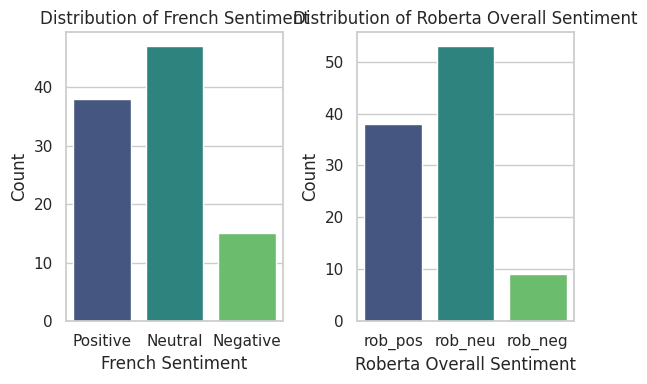

In [30]:
# Set up the plotting environment
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))

# Plot the distribution of french_sentiment
sns.countplot(ax=axes[0], data=random_sample, x='french_sentiment', palette='viridis')
axes[0].set_title('Distribution of French Sentiment')
axes[0].set_xlabel('French Sentiment')
axes[0].set_ylabel('Count')

# Plot the distribution of roberta_overall
sns.countplot(ax=axes[1], data=random_sample, x='roberta_overall', palette='viridis')
axes[1].set_title('Distribution of Roberta Overall Sentiment')
axes[1].set_xlabel('Roberta Overall Sentiment')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Agreement Percentage: 80.00%


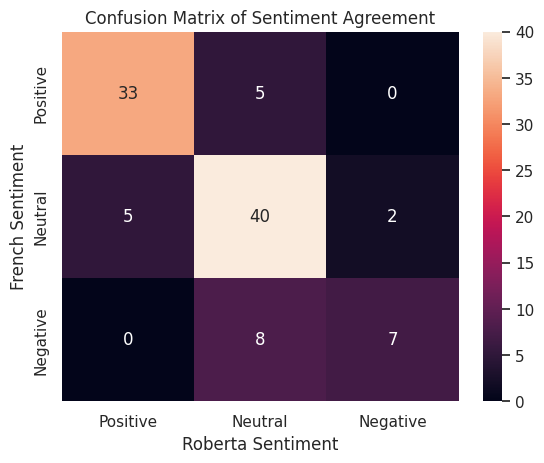

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Map roberta_overall to sentiment labels
random_sample['roberta_sentiment'] = random_sample['roberta_overall'].map({
    'rob_pos': 'Positive',
    'rob_neu': 'Neutral',
    'rob_neg': 'Negative'
})

# Compute the agreement
random_sample['agreement'] = random_sample['french_sentiment'] == random_sample['roberta_sentiment']

# Calculate the percentage of agreement
agreement_percentage = random_sample['agreement'].mean() * 100
print(f'Agreement Percentage: {agreement_percentage:.2f}%')

# Confusion matrix
cm = confusion_matrix(random_sample['french_sentiment'], random_sample['roberta_sentiment'], labels=["Positive", "Neutral", "Negative"])

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Positive", "Neutral", "Negative"], yticklabels=["Positive", "Neutral", "Negative"])
plt.xlabel('Roberta Sentiment')
plt.ylabel('French Sentiment')
plt.title('Confusion Matrix of Sentiment Agreement')
plt.show()

Rows represent the actual sentiment labels from the french_sentiment column. Columns represent the predicted sentiment labels from the roberta_sentiment column.

E.g., 33 tweets are correctly classified as Positive by both roberta_sentiment and french_sentiment. <br>
5 tweets are misclassified as Neutral by roberta_sentiment. <br>
0 tweets are misclassified as Negative by roberta_sentiment. <br>
